In [1]:
#%%capture

!pip install pyunpack
!pip install patool
!pip install SpeechRecognition


import os
os.environ["CUDA_VISIBLE_DEVICES"]='0,1'
os.system('apt-get install p7zip')

import glob
from pyunpack import Archive
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,activations
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import load_model
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import math
import shutil
import pickle
import multiprocessing
import gc
import speech_recognition as sr
from scipy.io import wavfile

tf.random.set_seed(9)
#%load_ext tensorboard   


In [2]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10698200029485314254
 xla_global_id: -1]

In [3]:
root_path = "C:\\Users\\57300\\OneDrive - KEDGE Business School\\Documents\\KBS\\2023-1\\Machine_Learning_Part2\\Final_project\\tensorflow-speech-recognition-challenge"

In [4]:
train_path = root_path + '\\train\\train\\audio_1'

**Visualization**

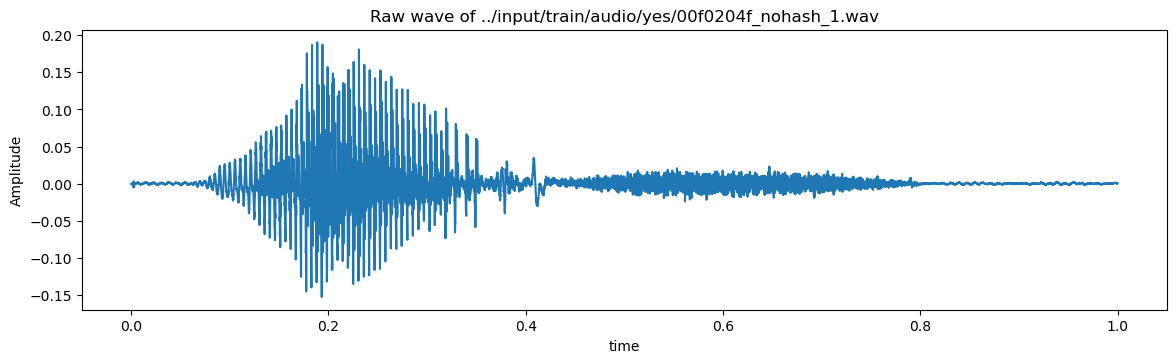

In [5]:
samples, sample_rate = librosa.load(train_path+'/yes/00f0204f_nohash_1.wav', sr = 16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/00f0204f_nohash_1.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

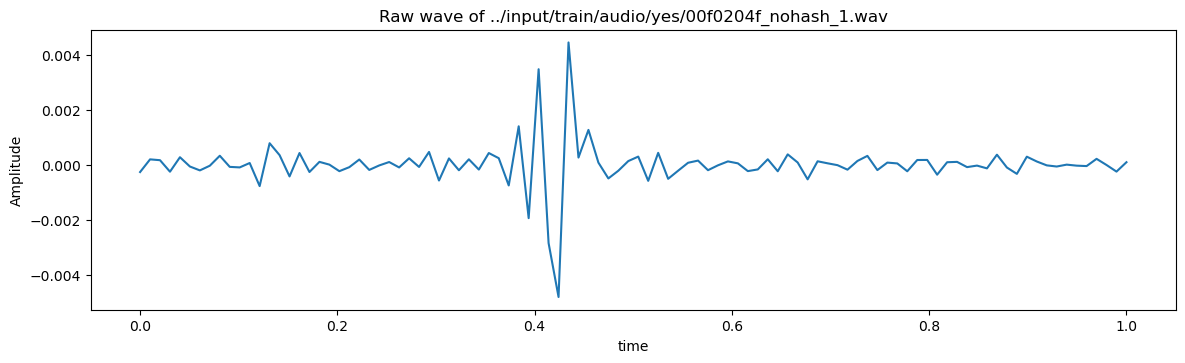

In [6]:
samples, sample_rate = librosa.load(train_path+'/yes/00f0204f_nohash_1.wav', sr = 100)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + '../input/train/audio/yes/00f0204f_nohash_1.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [7]:
train_audio_sample = os.path.join(train_path, "yes\\00f0204f_nohash_0.wav")
x,sr = librosa.load(train_audio_sample, sr = 16000)

ipd.Audio(x, rate=sr)

In [8]:
labels=os.listdir(train_path)

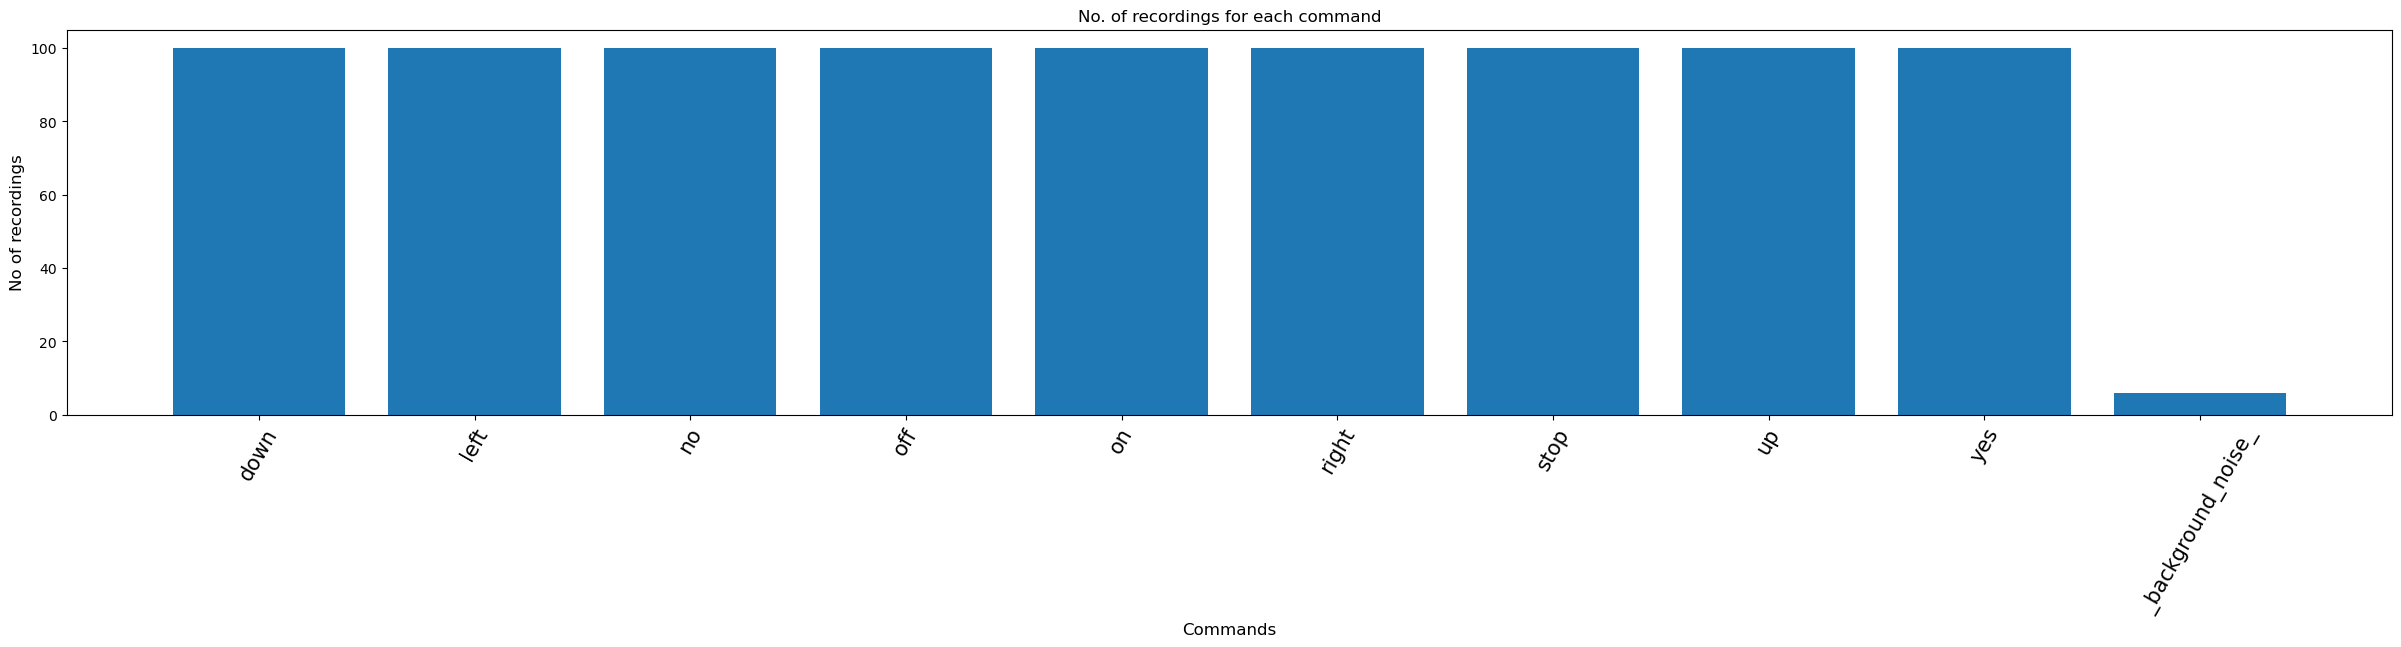

In [9]:
#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [10]:
# labels=["yes", "no","stop", "go"]
labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "_background_noise_"]

In [11]:
#Duration of recordings

C:\Users\57300\AppData\Local\Temp\ipykernel_8308\3373171975.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read(train_path + '/' + label + '/' + wav)


(array([900.,   0.,   0.,   0.,   0.,   0.,   5.,   0.,   0.,   1.]),
 array([ 0.4644375 ,  9.93630625, 19.408175  , 28.88004375, 38.3519125 ,
        47.82378125, 57.29565   , 66.76751875, 76.2393875 , 85.71125625,
        95.183125  ]),
 <BarContainer object of 10 artists>)

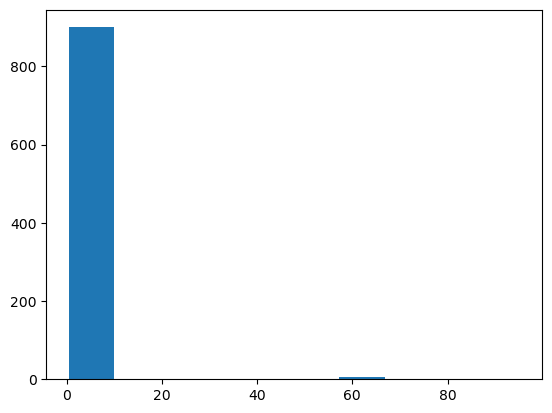

In [12]:
duration_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_path + '/' + label + '/' + wav)
        duration_of_recordings.append(float(len(samples)/sample_rate))
    
plt.hist(np.array(duration_of_recordings))

In [13]:
#Sampling rate

In [14]:
sample_rate=40000
samples, sample_rate = librosa.load(train_path+'/yes/00f0204f_nohash_1.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [15]:
sample_rate=16000
samples, sample_rate = librosa.load(train_path+'/yes/00f0204f_nohash_1.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [16]:
sample_rate=6000
samples, sample_rate = librosa.load(train_path+'/yes/00f0204f_nohash_1.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

In [17]:
sample_rate=3000
samples, sample_rate = librosa.load(train_path+'/yes/00f0204f_nohash_1.wav', sr = sample_rate)
ipd.Audio(samples, rate=sample_rate)

**Resampling**

In [18]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

C:\Users\57300\AppData\Local\Temp\ipykernel_8308\3767203450.py:1: FutureWarning: Pass orig_sr=3000, target_sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples = librosa.resample(samples, sample_rate, 8000)


In [19]:
labels=os.listdir(train_path)

In [20]:
all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

C:\Users\57300\AppData\Local\Temp\ipykernel_8308\3844545375.py:8: FutureWarning: Pass orig_sr=16000, target_sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples = librosa.resample(samples, sample_rate, 8000)


down
left
no
off
on
right
stop
up
yes
_background_noise_


In [21]:
print(type(all_wave))
print(len(all_wave))

<class 'list'>
808


In [22]:
print(len(all_wave))
print(all_wave[1].shape)
all_wave[1]

808
(8000,)


array([ 0.00129081,  0.00135689,  0.00019101, ...,  0.00158128,
       -0.00304939, -0.00498121], dtype=float32)

In [23]:
len(set(all_label))

9

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [25]:
classes

['down', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']

In [26]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [27]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [28]:
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [29]:
all_wave.shape

(808, 8000, 1)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [31]:
#CNN

In [32]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

In [33]:
inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(filters=8,kernel_size=13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7988, 8)           112       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2662, 8)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2662, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2652, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 884, 16)          0         
 1D)                                                         

In [34]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [36]:
history=model.fit(x_train, y_train ,epochs=20, callbacks=[es,mc], batch_size=32, validation_data=(x_test,y_test))

Epoch 1/20
21/21 [==============================] - 7s 262ms/step - loss: 2.2704 - accuracy: 0.1037 - val_loss: 2.2393 - val_accuracy: 0.1420
Epoch 2/20
21/21 [==============================] - 5s 226ms/step - loss: 2.2252 - accuracy: 0.1146 - val_loss: 2.2416 - val_accuracy: 0.1543
Epoch 3/20
21/21 [==============================] - 4s 194ms/step - loss: 2.2125 - accuracy: 0.1362 - val_loss: 2.1885 - val_accuracy: 0.1728
Epoch 4/20
21/21 [==============================] - 4s 175ms/step - loss: 2.1739 - accuracy: 0.1687 - val_loss: 2.1690 - val_accuracy: 0.1481
Epoch 5/20
21/21 [==============================] - 4s 210ms/step - loss: 2.1141 - accuracy: 0.1997 - val_loss: 2.1481 - val_accuracy: 0.2037
Epoch 6/20
21/21 [==============================] - 5s 217ms/step - loss: 2.0360 - accuracy: 0.2399 - val_loss: 2.0490 - val_accuracy: 0.2407
Epoch 7/20
21/21 [==============================] - 4s 199ms/step - loss: 1.9342 - accuracy: 0.2647 - val_loss: 1.9636 - val_accuracy: 0.2531
Epoch 

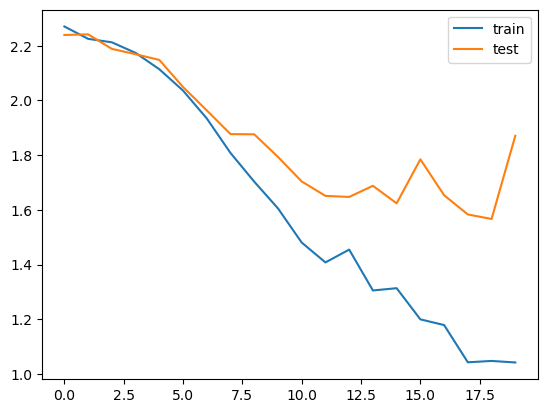

In [37]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [38]:
from keras.models import load_model
model.save("SpeechRecogModel.h5")
#model=load_model('/kaggle/working/best_model.hdf5')

In [39]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [40]:
import random
index=random.randint(0,len(x_test)-1)
samples=x_test[index].ravel()
print("Audio:",classes[np.argmax(y_test[index])])
ipd.Audio(samples, rate=8000)

Audio: yes


In [41]:
import random
index=random.randint(0,len(x_test)-1)
samples=x_test[index].ravel()
print("Audio:",classes[np.argmax(y_test[index])])
ipd.Audio(samples, rate=8000)

Audio: on


In [42]:
#LSTM

In [43]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, LSTM, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv3D, MaxPooling3D, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
#from keras.layers.recurrent import LSTM
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras import optimizers
from keras.optimizers import adam_v2
from keras.layers import Dropout

In [44]:
input_shape = x_train.shape[1:]
input_shape #(108, 162, 1, 1)

(8000, 1)

In [45]:
model1 = Sequential()
model1.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(LSTM(units=96,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=96,return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=96))
model1.add(Dropout(0.2))
model1.add(Dense(units=1))

In [46]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [47]:
history=model1.fit(x_train, y_train, epochs=10, batch_size=32,validation_data=(x_test, y_test),verbose=1,shuffle=False)

Epoch 1/10
21/21 [==============================] - 979s 46s/step - loss: 0.0911 - val_loss: 0.0900
Epoch 2/10
21/21 [==============================] - 960s 45s/step - loss: 0.0901 - val_loss: 0.0900
Epoch 3/10
21/21 [==============================] - 937s 44s/step - loss: 0.0900 - val_loss: 0.0900
Epoch 4/10
21/21 [==============================] - 927s 44s/step - loss: 0.0900 - val_loss: 0.0900
Epoch 5/10
21/21 [==============================] - 924s 43s/step - loss: 0.0900 - val_loss: 0.0900
Epoch 6/10
21/21 [==============================] - 985s 46s/step - loss: 0.0900 - val_loss: 0.0900
Epoch 7/10
21/21 [==============================] - 899s 43s/step - loss: 0.0900 - val_loss: 0.0900
Epoch 8/10
21/21 [==============================] - 1019s 49s/step - loss: 0.0900 - val_loss: 0.0900
Epoch 9/10
21/21 [==============================] - 1012s 48s/step - loss: 0.0900 - val_loss: 0.0900
Epoch 10/10
21/21 [==============================] - 1009s 47s/step - loss: 0.0900 - val_loss: 0.0

In [1]:
from sklearn.preprocessing import StandardScaler

In [3]:
test_loss, test_acc = model1.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: ",test_acc)

NameError: name 'model1' is not defined

6/6 [==============================] - 0s 13ms/step - loss: 1.8325 - accuracy: 0.3889
Accuracy of our model on test data :  38.88888955116272 %


KeyError: 'accuracy'

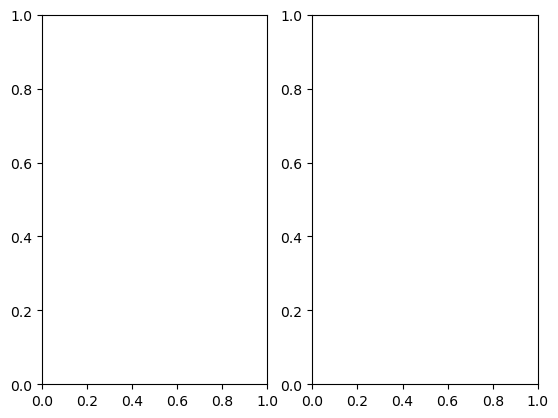

In [61]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [62]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(x_train)
dataset_test = scaler.transform(x_test)

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [56]:
predictions = model1.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

6/6 [==============================] - 27s 4s/step


NameError: name 'scaler' is not defined

## LSTM Model 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

### Model

In [ ]:
def build_model(input_shape):
    model = tf.keras.Sequential()

    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(LSTM(64))
    
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(6, activation='softmax'))

    return model

In [ ]:
# create network
input_shape = (8000,1)
model = build_model(input_shape)

# compile model
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=10)

In [ ]:
#David code

In [ ]:
hop_length = 256
S = librosa.feature.melspectrogram(x, sr=sr, n_fft=4096, hop_length=hop_length)
logS = librosa.power_to_db(abs(S))

plt.figure(figsize=(14, 9))

plt.figure(1)

plt.subplot(211)
plt.title('Spectrogram')
librosa.display.specshow(logS, sr=sr, hop_length=hop_length, x_axis= None, y_axis='mel')
#plt.colorbar(format='%+2.0f dB')

plt.subplot(212)
plt.title('Audioform')
librosa.display.waveplot(x, sr=sr)

In [ ]:
mfccs = librosa.feature.mfcc(x, sr=sr,  n_mfcc=40) 
scaler = StandardScaler()
ee= scaler.fit_transform(mfccs.T)

plt.figure(figsize=(14, 5))
librosa.display.specshow(ee.T)

In [ ]:
def pad_audio(samples, L):
    if len(samples) >= L: 
        return samples
    else: 
        return np.pad(samples, pad_width=(L - len(samples), 0), mode='constant', constant_values=(0, 0))
    
    
def chop_audio(samples, L=16000):
    while True:
        beg = np.random.randint(0, len(samples) - L)
        yield samples[beg: beg + L]


def choose_background_generator(sound, backgrounds, max_alpha = 0.7):
    if backgrounds is None:
        return sound
    my_gen = backgrounds[np.random.randint(len(backgrounds))]
    background = next(my_gen) * np.random.uniform(0, max_alpha)
    augmented_data = sound + background
    augmented_data = augmented_data.astype(type(sound[0]))
    return augmented_data 


def random_shift(sound, shift_max = 0.2, sampling_rate = 16000):
    shift = np.random.randint(sampling_rate * shift_max)
    out = np.roll(sound, shift)
    # time shift
    if shift > 0:
        out[:shift] = 0
    else:
        out[shift:] = 0
    return out


def random_change_pitch(x, sr=16000):
    pitch_factor = np.random.randint(1, 4)
    out = librosa.effects.pitch_shift(x, sr, pitch_factor)
    return out


def random_speed_up(x):
    where = ["start", "end"][np.random.randint(0, 1)]
    speed_factor = np.random.uniform(0, 0.5)
    up = librosa.effects.time_stretch(x, 1 + speed_factor)
    up_len = up.shape[0]
    if where == "end":
        up = np.concatenate((up, np.zeros((x.shape[0] - up_len,))))
    else:
        up = np.concatenate((np.zeros((x.shape[0] - up_len,)), up))
    return up


def get_image_list(train_audio_path):
    classes = os.listdir(train_audio_path)
    classes = [thisclass for thisclass in classes if thisclass != '_background_noise_']
    index = [i for i,j in enumerate(classes)]
    outlist = []
    labels = []
    for thisindex,thisclass in zip(index, classes):
        filelist = [f for f in os.listdir(os.path.join(train_audio_path, thisclass)) if f.endswith('.wav')]
        filelist = [os.path.join(train_audio_path, thisclass, x) for x in filelist]
        outlist.append(filelist)
        labels.append(np.full(len(filelist), fill_value= thisindex))   
    return outlist,labels,dict(zip(classes,index))


def split_train_test_stratified_shuffle(images_list, labels, train_size = 0.9):
    classes_size = [len(x) for x in images_list]
    classes_vector = [np.arange(x) for x in classes_size]
    total = np.sum(classes_size)
    total_train = [int(train_size * total * x) for x in classes_size / total]
    train_index = [np.random.choice(x,y,replace=False) for x,y in zip(classes_size,total_train)]
    validation_index = [np.setdiff1d(i,j) for i,j in zip(classes_vector,train_index)]

    train_set = [np.array(x)[idx] for x,idx in zip(images_list,train_index)]
    validation_set = [np.array(x)[idx] for x,idx in zip(images_list,validation_index)]
    train_labels = [np.array(x)[idx] for x,idx in zip(labels,train_index)]
    validation_labels = [np.array(x)[idx] for x,idx in zip(labels,validation_index)]

    train_set = np.array([element for array in train_set for element in array])
    validation_set = np.array([element for array in validation_set for element in array])
    train_labels = np.array([element for array in train_labels for element in array])
    validation_labels = np.array([element for array in validation_labels for element in array])

    train_shuffle = np.random.permutation(len(train_set))
    validation_shuffle =  np.random.permutation(len(validation_set))

    train_set = train_set[train_shuffle]
    validation_set = validation_set[validation_shuffle]
    train_labels = train_labels[train_shuffle]
    validation_labels = validation_labels[validation_shuffle]
    
    return train_set,train_labels,validation_set,validation_labels

        
def preprocess_data(file, background_generator, target_sr = 16000, n_mfcc = 40, threshold = 0.7):
    # downsample to 16 kHz
    x,sr = librosa.load(file, sr = target_sr)
    x = pad_audio(x, sr)
    if np.random.uniform(0, 1) > threshold:
        x = choose_background_generator(x, background_generator) # add noinse to 30% of data
    if np.random.uniform(0, 1) > threshold:
        x = random_shift(x) 
    if np.random.uniform(0, 1) > threshold: 
        x = random_change_pitch(x) 
    if np.random.uniform(0, 1) > threshold:
        x = random_speed_up(x) 
    mfccs = librosa.feature.mfcc(x, sr=sr,  n_mfcc=n_mfcc) # transpose for sklearn
    mfccs = np.moveaxis(mfccs, 1, 0)
    #scaler = MinMaxScaler() 
    scaler = StandardScaler() 
    mfccs_scaled = scaler.fit_transform(mfccs)
    return mfccs_scaled.reshape(mfccs_scaled.shape[0], mfccs_scaled.shape[1], 1) # channels last


class data_generator(Sequence):
    def __init__(self, x_set, y_set, batch_size, background_generator):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.background_generator = background_generator
        #self.on_epoch_end()

    def __len__(self):
        return  math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        idx_from = idx * self.batch_size
        idx_to = (idx + 1) * self.batch_size
        batch_x = self.x[idx_from:idx_to]
        batch_y = self.y[idx_from:idx_to]
        x = [preprocess_data(elem, self.background_generator) for elem in batch_x] 
        y = batch_y
        return np.array(x), np.array(y)
    
    #def on_epoch_end(self):
    #    print("Index epoch: %s, total samples %s" %(self.idx, (self.idx + 1) * self.batch_size))
        

def build_model(n_classes, input_shape):
    model_input = keras.Input(shape=input_shape)
    img_1 = layers.Convolution2D(filters = 32, kernel_size = (3,3), padding = "same", activation=activations.relu)(model_input)
    img_1 = layers.MaxPooling2D(pool_size=(2, 2))(img_1)
    img_1 = layers.Convolution2D(filters = 64, kernel_size = (3,3), padding = "same", activation=activations.relu)(img_1)
    img_1 = layers.MaxPooling2D(pool_size=(2, 2))(img_1)
    img_1 = layers.Convolution2D(filters = 128, kernel_size = (3,3), padding = "same", activation=activations.relu)(img_1)
    img_1 = layers.MaxPooling2D(pool_size=(2, 2))(img_1)
    img_1 = layers.Convolution2D(filters = 256, kernel_size = (3,3), padding = "same", activation=activations.relu)(img_1)
    img_1 = layers.MaxPooling2D(pool_size=(2, 2))(img_1)
    img_1 = layers.Dropout(rate=0.25)(img_1)
    img_1 = layers.Flatten()(img_1)
    img_1 = layers.Dense(128, activation=activations.relu)(img_1)
    img_1 = layers.Dropout(rate=0.5)(img_1)
    model_output = layers.Dense(n_classes, activation=activations.softmax)(img_1)
    model = keras.Model(model_input, model_output)
    return model


def multiclass_roc(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    all_labels = np.unique(y_test)

    for (idx, c_label) in enumerate(all_labels):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

In [ ]:
wavfiles = glob.glob(os.path.join(train_path, "_background_noise_\\*wav"))
wavfiles = [librosa.load(elem, sr = 16000)[0] for elem in wavfiles]
background_generator = [chop_audio(x) for x in wavfiles]

In [ ]:
# load train

images_list,labels,classes_map =  get_image_list(train_path)

train_set,train_labels,validation_set,validation_labels = split_train_test_stratified_shuffle(images_list,labels)
train_datagen = data_generator(train_set, train_labels, 40, background_generator)
validation_datagen = data_generator(validation_set, validation_labels,40,  None)

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(preprocess_data(train_audio_sample, None).reshape(32, 40).T)

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(preprocess_data(train_audio_sample, background_generator).reshape(32, 40).T)

In [ ]:
start_random = random_shift(x)
ipd.Audio(start_random , rate=sr)

In [ ]:
higher_speed = random_speed_up(x)
ipd.Audio(higher_speed , rate=sr)

In [ ]:
pitch_changed = random_change_pitch(x)
ipd.Audio(pitch_changed, rate=sr)

In [ ]:
inv_map =  {v: k for k, v in classes_map.items()}
any_present=[i in validation_set for i in train_set]
np.any(any_present)

In [ ]:
# Same order in 

test1 = np.random.randint(10, 100, 10)

train_set[test1],[inv_map[int(i)] for i in train_labels[test1]]

In [ ]:
test1 = np.random.randint(10, 100, 10)
validation_set[test1],[inv_map[int(i)] for i in validation_labels[test1]]

In [ ]:
validation_labels[test1]

In [ ]:
#CNN MODEL

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow.keras.layers import Input,Dense,Flatten,Conv1D,MaxPooling1D,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
num_class=30
model=keras.Sequential()
model.add(keras.layers.Conv1D(filters=8, kernel_size=13,activation=tf.nn.relu,input_shape=(22050,1)))
model.add(keras.layers.MaxPooling1D(3))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Conv1D(filters=16, kernel_size=11,activation=tf.nn.relu))
model.add(keras.layers.MaxPooling1D(3))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Conv1D(filters=32, kernel_size=9,activation=tf.nn.relu))
model.add(keras.layers.MaxPooling1D(3))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Conv1D(filters=64, kernel_size=7,activation=tf.nn.relu))
model.add(keras.layers.MaxPooling1D(3))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Dense(128,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3))
model.add(keras.layers.Dense(num_class,activation=tf.nn.softmax))

In [ ]:
model.summary()

In [ ]:
validation_set

In [ ]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(train_set,train_labels,epochs=15)

In [ ]:
#LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten, Dropout, BatchNormalization
from keras.layers import TimeDistributed

In [ ]:
train_set

In [ ]:
train_set.shape, train_labels.shape, validation_set.shape, validation_labels.shape

In [ ]:
#Modeling
input_shape = train_set.shape[0:]
input_shape


In [ ]:
input_shape #(108, 162, 1, 1)


model=Sequential()

model.add(TimeDistributed(Conv1D(16, 3, padding='same', activation='relu'),input_shape=input_shape))
model.add(TimeDistributed(BatchNormalization()))
#model.add(TimeDistributed(MaxPooling2D((2,1))))

model.add(TimeDistributed(Flatten()))
model.add(LSTM(32))
model.add(Dropout(0.2))

model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=8, activation='softmax'))

model.summary()